In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from sklearn.cluster import KMeans

In [4]:
data=pd.read_csv('./data/air_data.csv')

In [5]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [6]:
data.isnull().sum()

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

In [7]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


### 数据清洗

In [8]:
data=data[data['SUM_YR_1'].notnull()&data['SUM_YR_2'].notnull()]

In [9]:
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0)
data = data[index1 | index2 | index3] #该规则是“或”

- 找出与客户价值LRFMC模型相关的特征，其余特征去除

In [10]:
data = data[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014/03/31,2006/11/02,1,210,580717,0.961639
1,2014/03/31,2007/02/19,7,140,293678,1.252314
2,2014/03/31,2007/02/01,11,135,283712,1.254676
3,2014/03/31,2008/08/22,97,23,281336,1.090870
4,2014/03/31,2009/04/10,5,152,309928,0.970658


In [13]:
data['L']=pd.to_datetime(data['LOAD_TIME'])-pd.to_datetime(data['FFP_DATE'])


In [27]:
data.drop(['LOAD_TIME','FFP_DATE'],inplace=True,axis=1)

In [32]:
data.columns=['R','F','M','C','L']

In [34]:
data['L']=(data['L']/np.timedelta64(1,'D')).astype(int)

In [35]:
data

,R,F,M,C,L
0,1,210,580717,0.961639,2706
1,7,140,293678,1.252314,2597
2,11,135,283712,1.254676,2615
3,97,23,281336,1.090870,2047
4,5,152,309928,0.970658,1816
...,...,...,...,...,...
62974,89,2,368,0.710000,3249
62975,121,2,368,0.670000,1961
62976,39,2,1062,0.225000,1362
62977,464,2,904,0.250000,466


### 标准化处理

In [36]:
data=(data-data.mean())/data.std()
data.head()

,R,F,M,C,L
0,-0.944948,14.034016,26.761154,1.295540,1.435707
1,-0.911894,9.073213,13.126864,2.868176,1.307152
2,-0.889859,8.718869,12.653481,2.880950,1.328381
3,-0.416098,0.781585,12.540622,1.994714,0.658476
4,-0.922912,9.923636,13.898736,1.344335,0.386032


### 数据建模

- 利用KMeans算法进行聚类分析,得到细分的用户群
- 对细分的客户群进行特征分析,得到客户价值分析模型

In [37]:
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
score=[]
inertia=[]
nums=range(2,10)
for n_clusters in range(2,10):
    km=KMeans(n_clusters=n_clusters,random_state=10)
    km.fit(data)
    inertia.append(km.inertia_)
    score.append(silhouette_score(data,km.labels_,sample_size=128,metric='euclidean'))

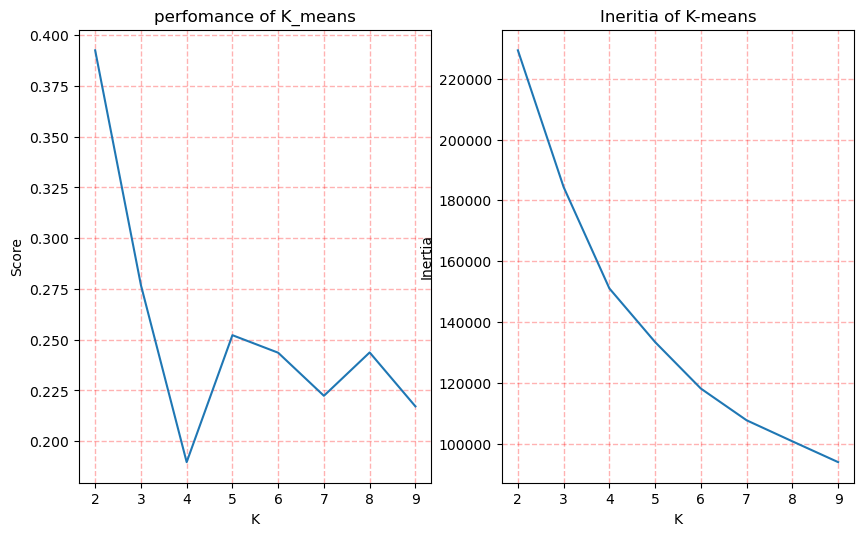

In [48]:
fig,axis=plt.subplots(1,2,figsize=(10,6),dpi=100)
axis[0].set_title('perfomance of K_means')
axis[1].set_title('Ineritia of K-means')

axis[0].plot(nums,score)

axis[0].set_xlabel('K')
axis[0].set_ylabel('Score')
axis[0].grid(color='r', linestyle='--', linewidth=1, alpha=0.3)
axis[1].plot(nums,inertia)

axis[1].set_xlabel('K')
axis[1].grid(color='r', linestyle='--', linewidth=1, alpha=0.3)
axis[1].set_ylabel('Inertia')
plt.show()

- 分成5份试试

In [50]:
k=5
km=KMeans(n_clusters=k)
km.fit(data)
print(km.cluster_centers_)
print(km.labels_)

[[-0.40914624 -0.1672703  -0.16880642 -0.21223237 -0.69677515]
 [-0.36986617 -0.09426239 -0.10313783 -0.13060807  1.1524351 ]
 [-0.07614061 -0.1093777  -0.08920032  2.6766021   0.17010218]
 [ 1.66944049 -0.57308516 -0.53755037 -0.13436205 -0.31499356]
 [-0.79836095  2.48546032  2.42553679  0.28178707  0.48143585]]
[4 4 4 ... 0 3 3]


In [52]:
labelsCounts = pd.DataFrame(km.labels_)[0].value_counts()
labelsCounts

0    25349
1    16081
3    12435
4     5311
2     2868
Name: 0, dtype: int64